In [1]:
%load_ext autoreload
%autoreload 2
# Add parent directory into system path
import sys, os
sys.path.insert(1, os.path.abspath(os.path.normpath('..')))

import torch
from torch import nn
from torch.nn.init import calculate_gain
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f'CUDA {i}: {torch.cuda.get_device_name(i)}')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cpu')

from utils.operator import gradient
from models import M4, MLP_PINN

torch.set_default_dtype(torch.float32)
torch.set_printoptions(threshold=10_000)
torch.set_printoptions(linewidth=200)
torch.set_printoptions(edgeitems=3)

CUDA 0: NVIDIA GeForce GTX 1650 Ti


In [7]:
dataset_name = '../datasets/box_1f0_gyroid_4pi'
output_stl = dataset_name+'/raw.stl'
#model_pth = '../runs/model_1/box_1f0_gyroid_4pi/1646795825/1500.pth'
model_pth = '../runs/model_1/box_1f0_gyroid_4pi/1646805321/15.pth'

from models.MLP import Davies2021
net = Davies2021(N_layers=8, width=32, activation=nn.Softplus(30), last_activation=nn.Softplus(30)).to(device)
net.load_state_dict(torch.load(model_pth))

<All keys matched successfully>

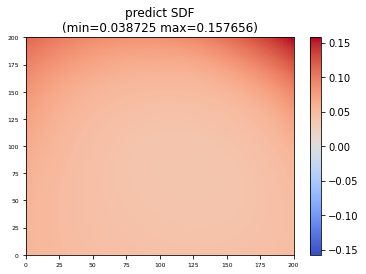

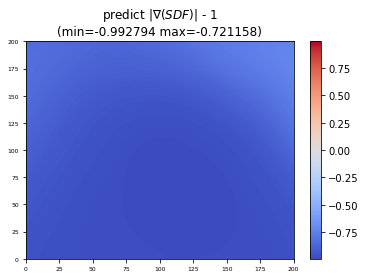

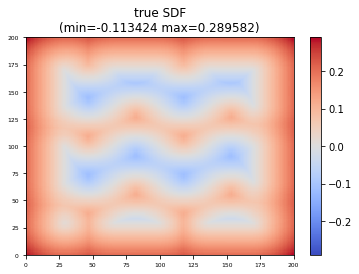

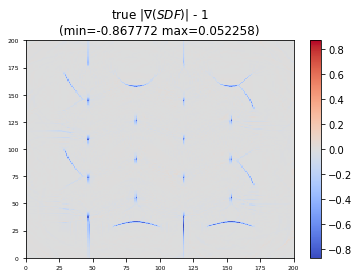

In [8]:
from utils.visualizer import SDFVisualize
net.to(device)
visualize = SDFVisualize(z_level=0.0, scale_offset=0.2, nums=200, device=device)
visualize.from_nn(net, bounds_from_mesh=output_stl)
visualize.from_mesh(output_stl)

In [9]:
from utils.iou import test_iou
from utils.dataset_generator import TestDataset
test_dataset = TestDataset('../datasets/box_1f0_gyroid_4pi/test.npz', device=device)
test_iou(net, test_dataset.uniform.points, test_dataset.uniform.sdfs)

tensor([0.], device='cuda:0')